In [1]:
#基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
#載入資料
df = pd.read_csv('IBM_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


沒有遺漏值但TotalCharges這個變數有問題，其為類別資料，但總收費不應該是類別資料。

In [4]:
#將其轉為浮點數
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
#檢視有問題的資料
for idx,d in enumerate(df['TotalCharges']):
    try:
        float(d)
    except:
        print(f'problem data {d} at index {idx}')

In [23]:
df.query('TotalCharges==" "').head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


這些有問題的資料是因為卡都沒開通(tenure=0)，故應該把遺漏值設為0

In [3]:
#將空白資料轉為0
df['TotalCharges']=df['TotalCharges'].replace(" ",0)
#將其轉為浮點數
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [25]:
#觀察目標變數-流失的客人(Churn)
size=df['Churn'].value_counts()
pct =df['Churn'].value_counts(normalize=True).round(2)
pd.DataFrame(zip(size,pct),columns=['次數','百分比'],index=['No','Yes'])

,次數,百分比
No,5174,0.73
Yes,1869,0.27


In [4]:
#設定欄位
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})
df.drop('customerID',axis=1,inplace=True)
df_orig = df.copy()

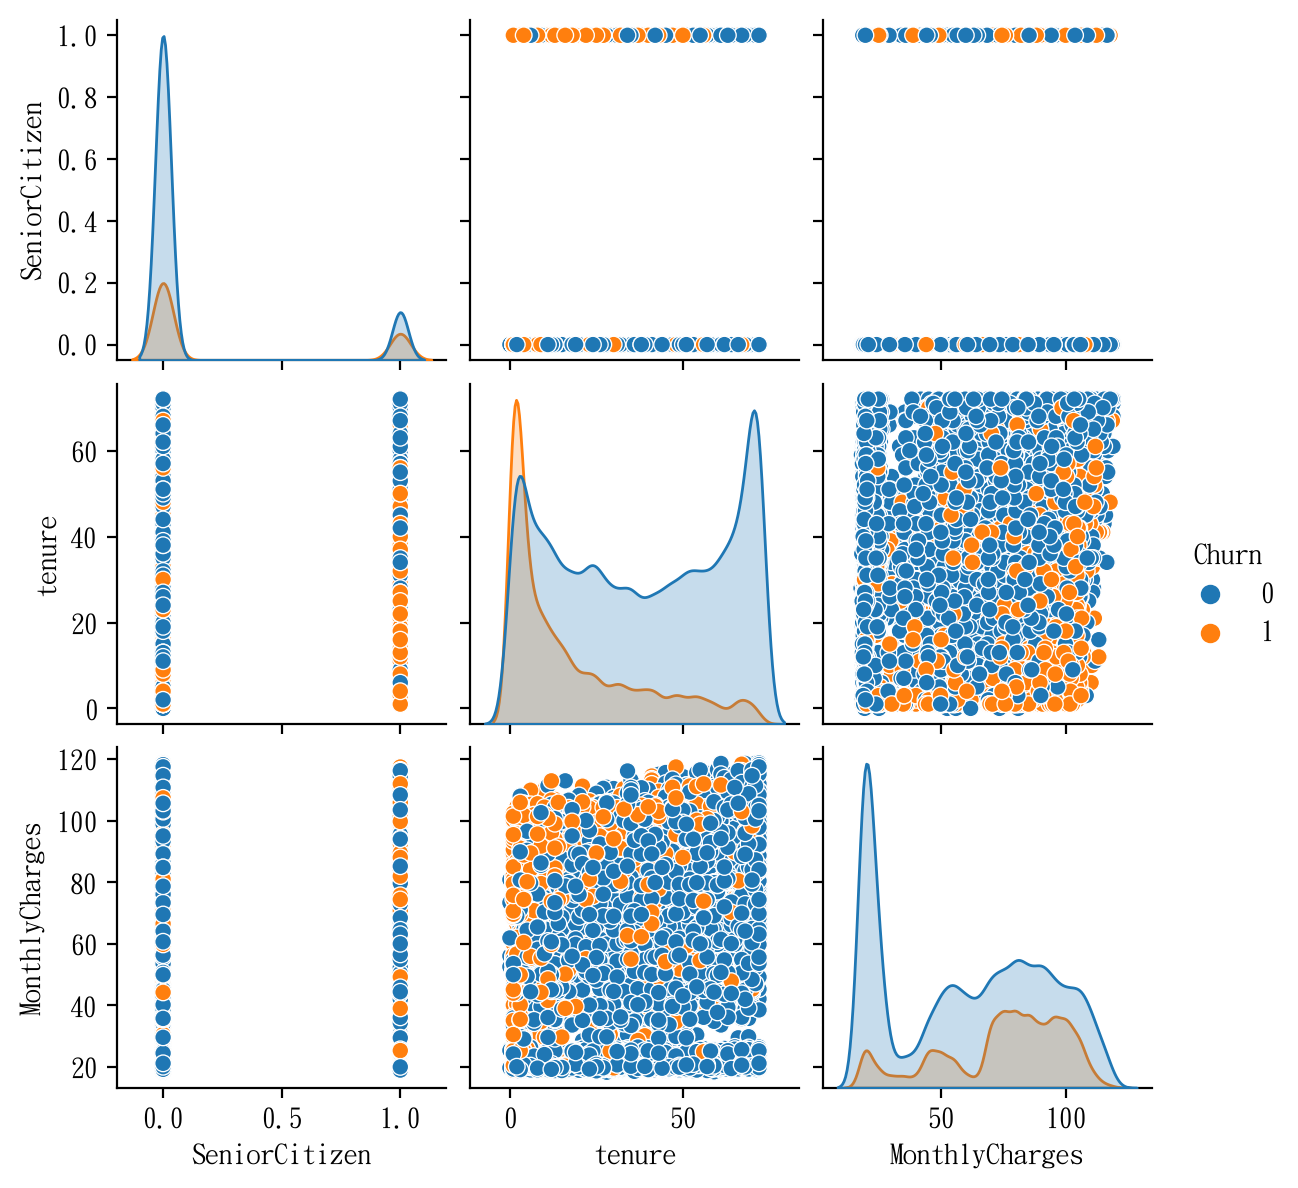

In [7]:
#檢視變數之間的關係
sns.pairplot(df,hue='Churn',size=2,diag_kws={'bw':0.1})

藍色代表留下來，橘色代表離開。從資料來看年紀大(SeniorCitizen)的表較會流失，年資較淺(tenure)比較會離開，每個月花費較高(MonthlyCharges)比較會離開，總花費(TotalCharges)較少比較會離開。

<AxesSubplot:>

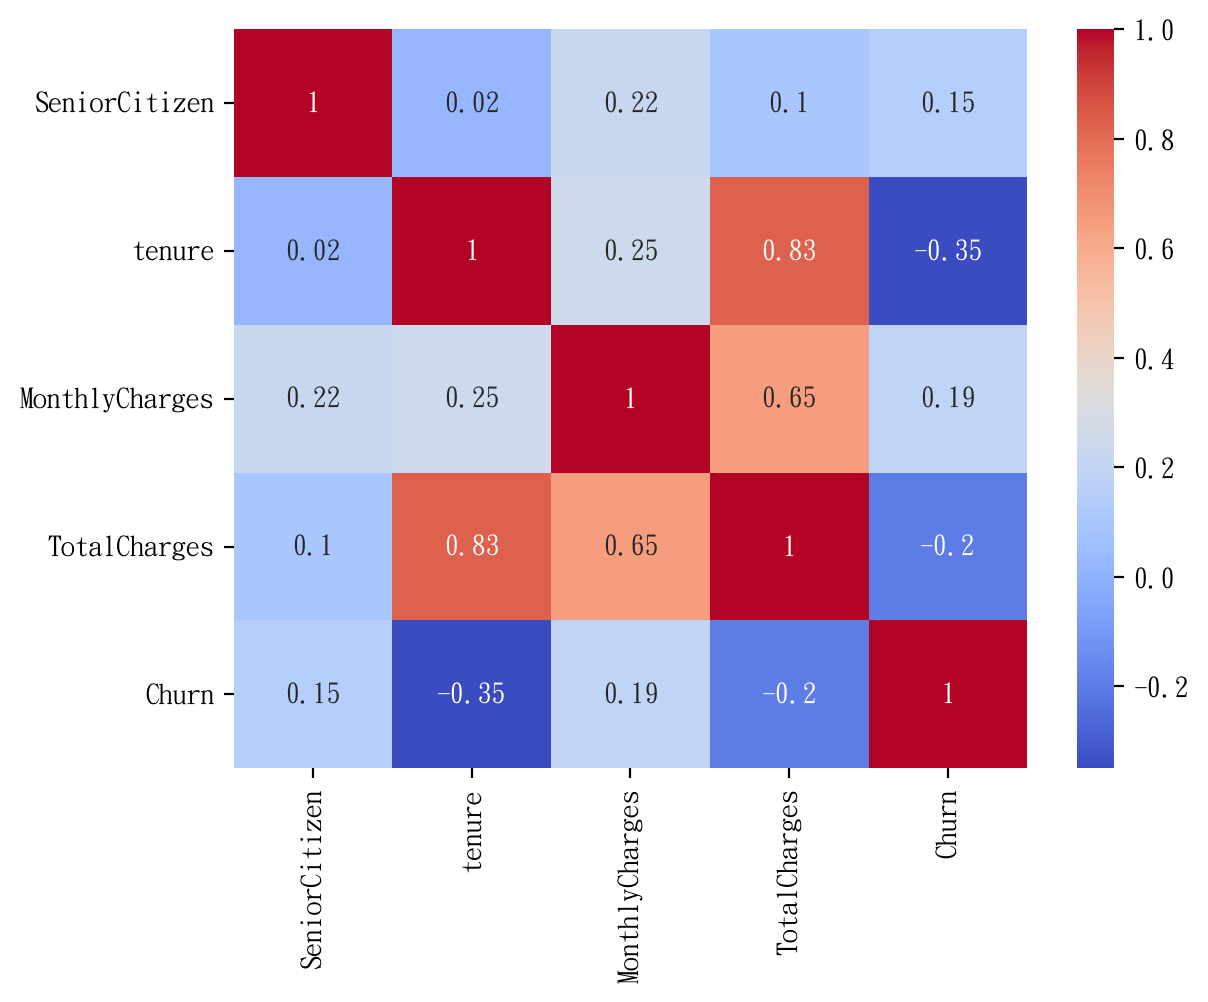

In [5]:
#查看相關係數
sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm')

總花費與年資成高度相關為0.83，另一個高度相關為總花費與月花費為0.65

In [9]:
#檢視所有連續變數和目標變數的關係
df.corrwith(df['Churn']).round(2)

SeniorCitizen     0.15
tenure           -0.35
MonthlyCharges    0.19
Churn             1.00
dtype: float64

從相關係數來看年紀大(SeniorCitizen)的表較會流失，年資越老(tenure)越不會離開，每個月花費(MonthlyCharges)較高比較會離開，總花費(TotalCharges)較高比較不會離開。

<AxesSubplot:ylabel='Frequency'>

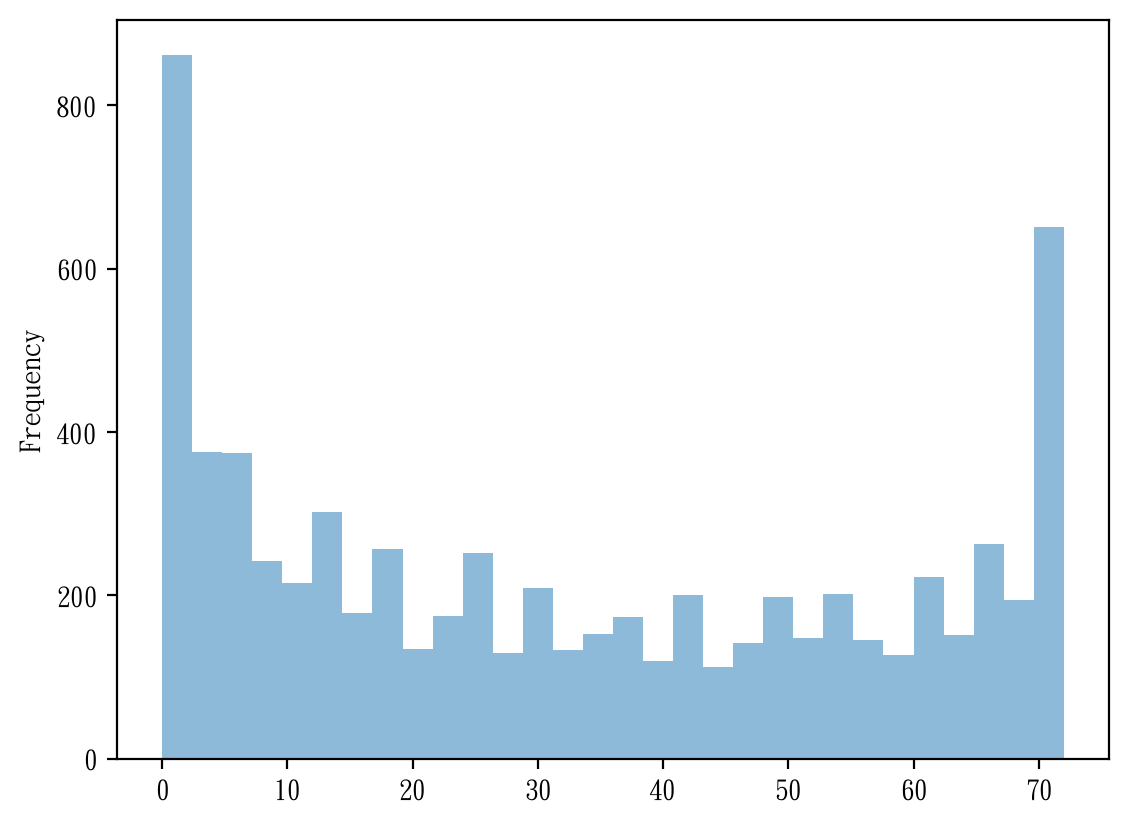

In [10]:
#年資的直方圖
df['tenure'].plot(kind='hist',bins=30,alpha=0.5)

沒有使用和使用年資70的族群人數較多

In [11]:
#查看男女流失比
df.groupby('gender')['Churn'].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [6]:
#定義與切割
x = df.drop('Churn',axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [7]:
#整理資料
x_col_num = x.select_dtypes(exclude = 'object').columns
x_col_cat = x.select_dtypes(include = 'object').columns

In [14]:
#檢視類別變數
df[x_col_cat].nunique()

gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
dtype: int64

In [8]:
#整合
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
data_pl = ColumnTransformer([('num',StandardScaler(),x_col_num),('cat',OneHotEncoder(),x_col_cat)])

In [9]:
#檢視基礎預測結果
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report#正確率、混亂矩陣、綜合報告
dmy = DummyClassifier(strategy='most_frequent')
dmy.fit(x_train,y_train)
dmy.score(x_train,y_train)
y_pred = dmy.predict(x_test)
print('整體正確率:',accuracy_score(y_test,y_pred).round(2))
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

整體正確率: 0.74
混亂矩陣
      預測1  預測2
實際1  1571    0
實際2   542    0
綜合報告
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1571
           1       0.00      0.00      0.00       542

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.55      0.74      0.63      2113



In [10]:
#先使用四個預測模型來比較出最佳模型來預測
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
model_pl=Pipeline([('preprocess',data_pl),('model',LogisticRegression())])
param_grid = {'model':[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=10)]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score = gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 LogisticRegression()
訓練集的最佳結果 0.806
測試集訓練結果 0.798
混亂矩陣
      預測1  預測2
實際1  1399  172
實際2   254  288
綜合報告
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1571
           1       0.63      0.53      0.57       542

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



在這裡最佳模型選擇是羅吉斯迴歸，正確率為0.798，但由於是要找回失去的客戶，而召回率只有0.53不夠理想，故要做些修正。

In [41]:
#進行權重的調整
model_pl=Pipeline([('preprocess',data_pl),('model',LogisticRegression())])
param_grid = {'model':[LogisticRegression(class_weight='balanced'),SVC(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced',max_depth=10)]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score=gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 SVC(class_weight='balanced')
訓練集的最佳結果 0.752
測試集訓練結果 0.744
混亂矩陣
      預測1  預測2
實際1  1160  411
實際2   129  413
綜合報告
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1571
           1       0.50      0.76      0.60       542

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.76      2113



經過權重調整後，最佳模型選擇是支持向量機，正確率為0.744，不如原模型，但召回率提升到0.76。

In [33]:
pip install imblearn


     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [12]:
#使用向下取樣
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline_im
model_pl=Pipeline_im([('preprocess',data_pl),('resample',RandomUnderSampler()),('model',LogisticRegression())])
param_grid = {'model':[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=10)]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score = gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 LogisticRegression()
訓練集的最佳結果 0.749
測試集訓練結果 0.735
混亂矩陣
      預測1  預測2
實際1  1120  451
實際2   109  433
綜合報告
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1571
           1       0.49      0.80      0.61       542

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.70      2113
weighted avg       0.80      0.73      0.75      2113



在這裡最佳模型選擇是羅吉斯迴歸，正確率為0.735，雖然比調整權重還有所下降，但召回率提高到0.8。

In [13]:
#向上取樣
from imblearn.over_sampling import SMOTE
model_pl=Pipeline_im([('preprocess',data_pl),('resample',SMOTE()),('model',LogisticRegression())])
param_grid = {'model':[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=10)]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score = gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 SVC()
訓練集的最佳結果 0.769
測試集訓練結果 0.753
混亂矩陣
      預測1  預測2
實際1  1212  359
實際2   162  380
綜合報告
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1571
           1       0.51      0.70      0.59       542

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



在這裡最佳模型選擇是支持向量機，正確率為0.753，略優於向下取樣和權重調整，但召回率降低到0.7。

In [52]:
#向下取樣，使用各式組合預測器來進行
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
model_pl=Pipeline_im([('preprocess',data_pl),('resample',RandomUnderSampler()),('model',LogisticRegression())])
param_grid = {'model':[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),BaggingClassifier()]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score=gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 RandomForestClassifier()
訓練集的最佳結果 0.748
測試集訓練結果 0.731
混亂矩陣
      預測1  預測2
實際1  1138  433
實際2   135  407
綜合報告
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1571
           1       0.48      0.75      0.59       542

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.73      0.75      2113



使用組合器的最佳選擇是隨機森林，正確率為0.731，略差於不使用組合器的結果，且召回率為0.75，只高於向上取樣。

In [53]:
#向上取樣，使用各式組合預測器來進行
from imblearn.over_sampling import SMOTE
model_pl=Pipeline_im([('preprocess',data_pl),('resample',SMOTE()),('model',LogisticRegression())])
param_grid = {'model':[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),BaggingClassifier()]}
gs=GridSearchCV(model_pl,param_grid=param_grid,cv=5,return_train_score=True)
gs.fit(x_train,y_train)
score = gs.best_estimator_.score(x_test,y_test)
print('最佳預測模型和參數',gs.best_params_['model'])
print('訓練集的最佳結果',gs.best_score_.round(3))
print('測試集訓練結果',score.round(3))
y_pred = gs.best_estimator_.predict(x_test)
print('混亂矩陣')
print(pd.DataFrame(confusion_matrix(y_test,y_pred),index=['實際1','實際2'],columns=['預測1','預測2']))
print('綜合報告')
print(classification_report(y_test,y_pred))

最佳預測模型和參數 GradientBoostingClassifier()
訓練集的最佳結果 0.79
測試集訓練結果 0.779
混亂矩陣
      預測1  預測2
實際1  1296  275
實際2   193  349
綜合報告
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1571
           1       0.56      0.64      0.60       542

    accuracy                           0.78      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.79      0.78      0.78      2113



使用組合器的最佳選擇是梯度強化器，正確率為0.779，只不如未調整羅吉斯迴歸，但召回率只有0.64，效果不好。

AUC分數:0.8384029257224462


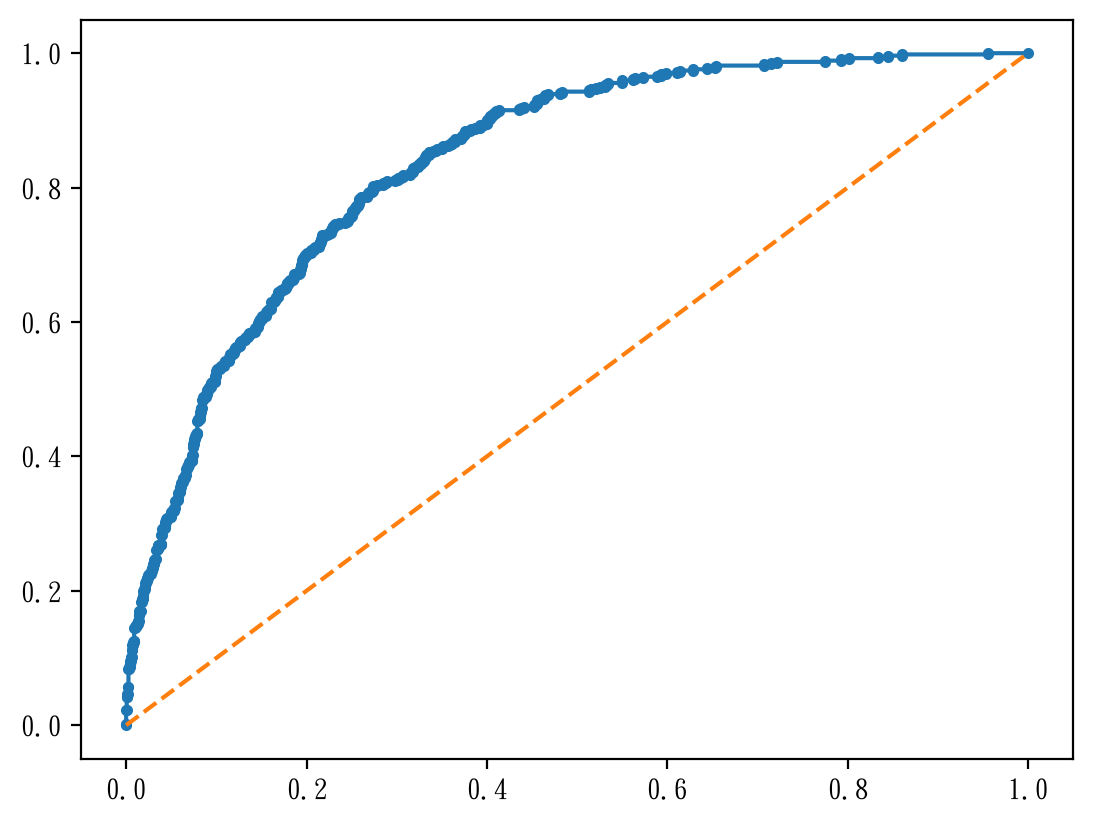

In [47]:
#繪製ROC圖(羅吉斯參數調整後)
from sklearn.metrics import roc_curve,roc_auc_score
model_pl=make_pipeline(data_pl,LogisticRegression(class_weight='balanced')) 
model_pl.fit(x_train,y_train)
y_pred_porba = model_pl.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_porba)
plt.plot(fpr,tpr,marker='.')
plt.plot([0,1],[0,1],ls='--')
print(f'AUC分數:{roc_auc_score(y_test,y_pred_porba)}')

AUC分數:0.838代表分類表現相當優秀

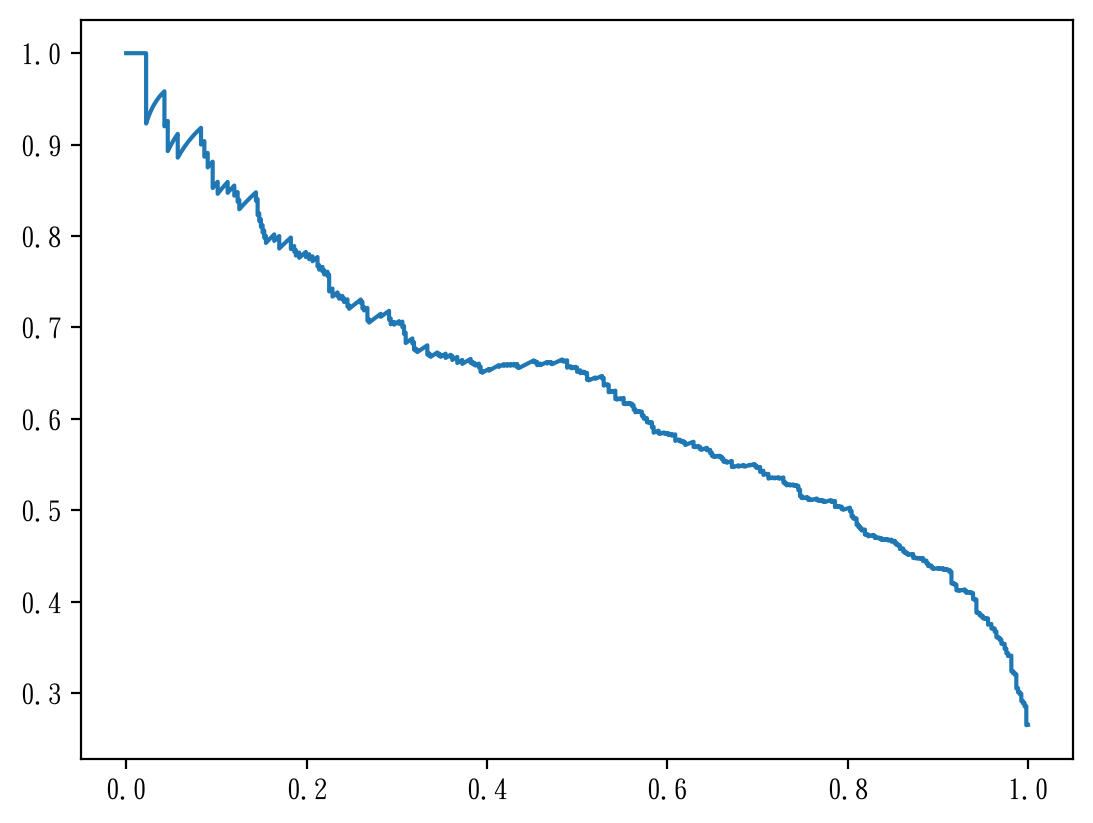

In [57]:
#繪製PRC圖
from sklearn.metrics import precision_recall_curve
model_pl=make_pipeline(data_pl,LogisticRegression(class_weight='balanced')) 
model_pl.fit(x_train,y_train)
y_pred_porba = model_pl.predict_proba(x_test)[:,1]
prec,recall,thres = precision_recall_curve(y_test,y_pred_porba)
plt.plot(recall,prec)

結論:客戶流失預測會有失衡問題，所以需要進行調整來提高1的召回率以預測客戶的流失。而在這裡可以採用調整權重的方法，並使用羅吉斯迴歸或支持向量機進行預測。